In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
from plotting_utils import plot_image, plot_probabilities

from sentinelhub import CRS, BBox, DataCollection, MimeType, SentinelHubRequest, SHConfig, bbox_to_dimensions

from s2cloudless import CloudMaskRequest, S2PixelCloudDetector, get_s2_evalscript

C:\Users\Harith\anaconda3\envs\sentinal\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sentinelhub import SHConfig

config = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

In [6]:
bbox = BBox([-90.9217, 14.4191, -90.8187, 14.5520], crs=CRS.WGS84)


In [7]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL2_L1C, time_interval="2017-12-01")
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=bbox_to_dimensions(bbox, 10),
    config=config,
)

true_color_image = request.get_data()[0]

true_color_image.shape

(1481, 1097, 3)

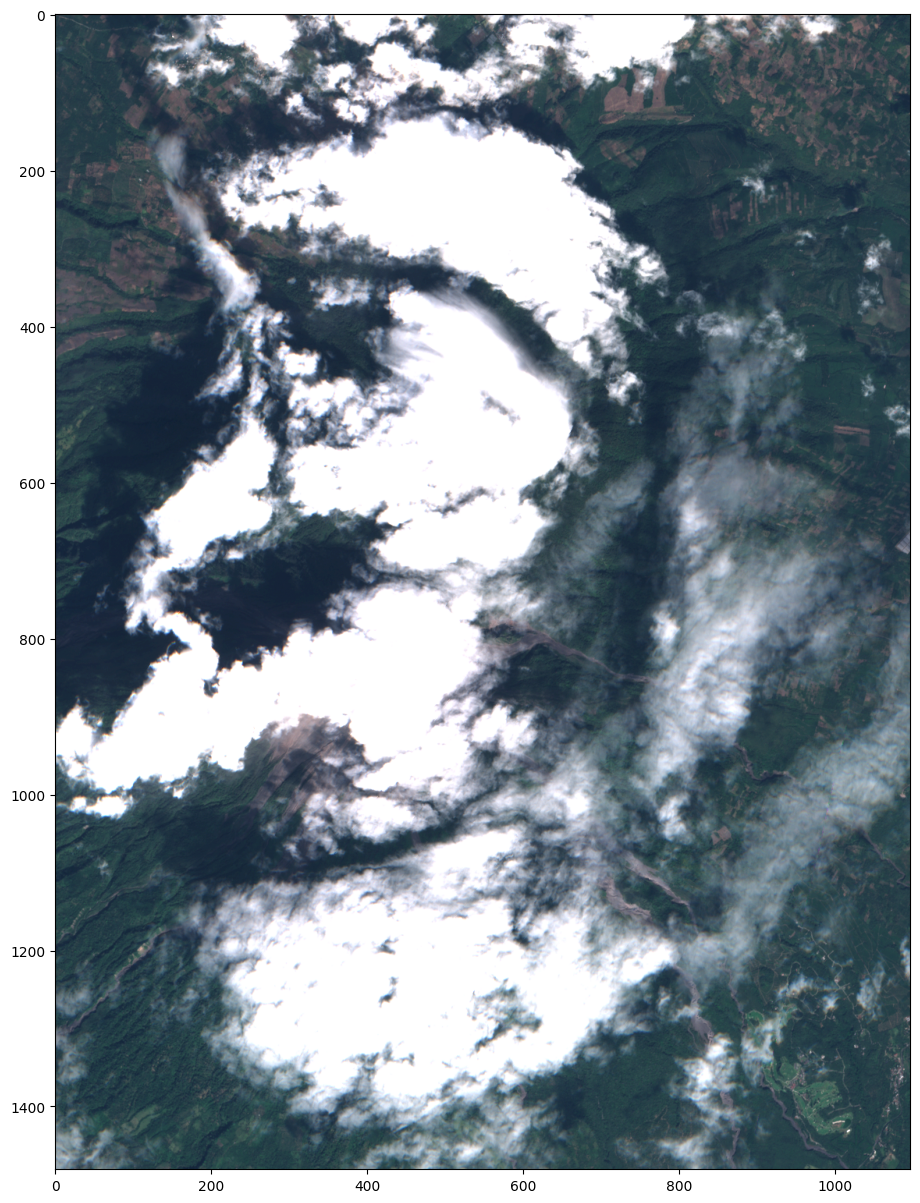

In [8]:
plot_image(true_color_image)
